<a href="https://colab.research.google.com/github/RoronoaKarthi/IBM_EDUNET_GENAI/blob/main/Heart_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
7/7 [==============================] - 8s 171ms/step - loss: 0.6880 - accuracy: 0.6736 - val_loss: 0.6824 - val_accuracy: 0.6939
Epoch 2/50
7/7 [==============================] - 0s 13ms/step - loss: 0.6764 - accuracy: 0.7565 - val_loss: 0.6699 - val_accuracy: 0.6939
Epoch 3/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6651 - accuracy: 0.8135 - val_loss: 0.6574 - val_accuracy: 0.7347
Epoch 4/50
7/7 [==============================] - 0s 13ms/step - loss: 0.6519 - accuracy: 0.8394 - val_loss: 0.6420 - val_accuracy: 0.7755
Epoch 5/50
7/7 [==============================] - 0s 14ms/step - loss: 0.6359 - accuracy: 0.8290 - val_loss: 0.6242 - val_accuracy: 0.7959
Epoch 6/50
7/7 [==============================] - 0s 13ms/step - loss: 0.6184 - accuracy: 0.8497 - val_loss: 0.6069 - val_accuracy: 0.7755
Epoch 7/50
7/7 [==============================] - 0s 14ms/step - loss: 0.5960 - accuracy: 0.8342 - val_loss: 0.5840 - val_accuracy: 0.7755
Epoch 8/50
7/7 [==========

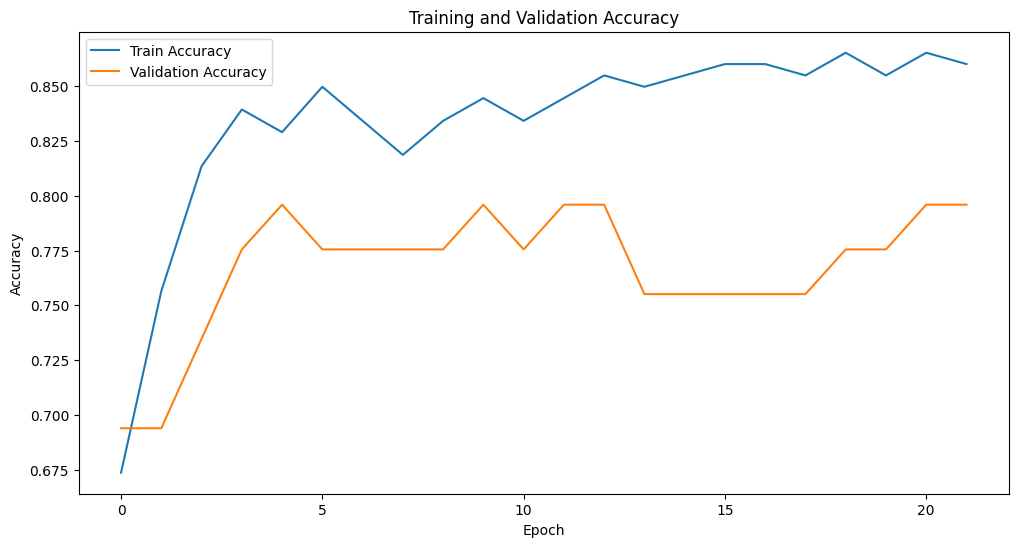

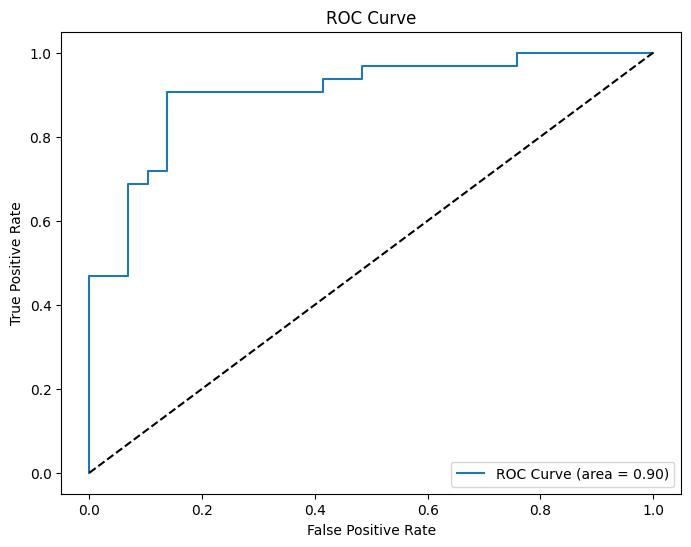

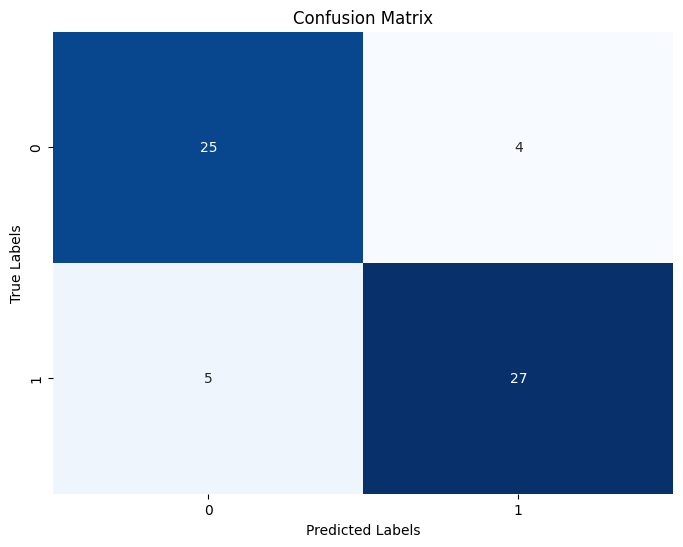

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
data = pd.read_csv('/content/heart.csv')

# Data preprocessing
X = data.drop('target', axis=1).values
y = data['target'].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM input (3D tensor)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Model evaluation
y_pred_proba = model.predict(X_test)
y_pred = np.round(y_pred_proba).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


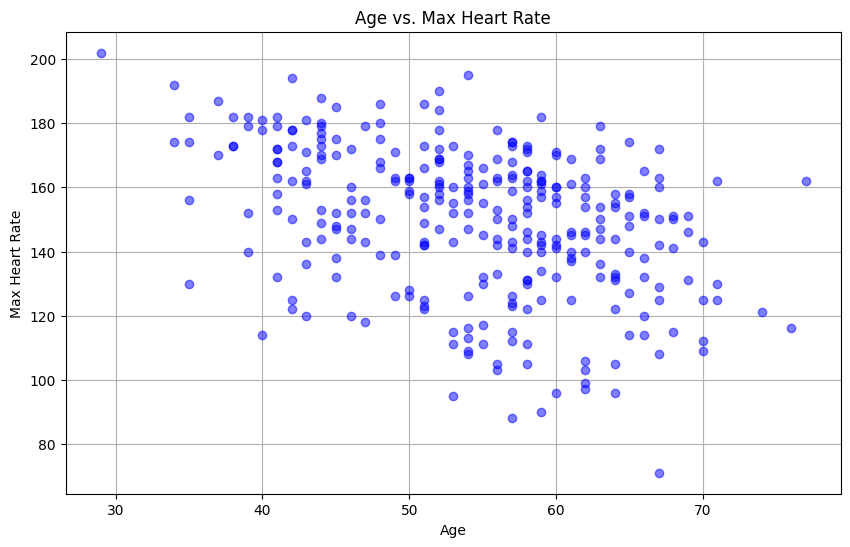

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/heart.csv')

# Plot heart rate
plt.figure(figsize=(10, 6))
plt.plot(data['age'], data['thalach'], 'bo', alpha=0.5)  # Scatter plot of age vs. maximum heart rate
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Age vs. Max Heart Rate')
plt.grid(True)
plt.show()


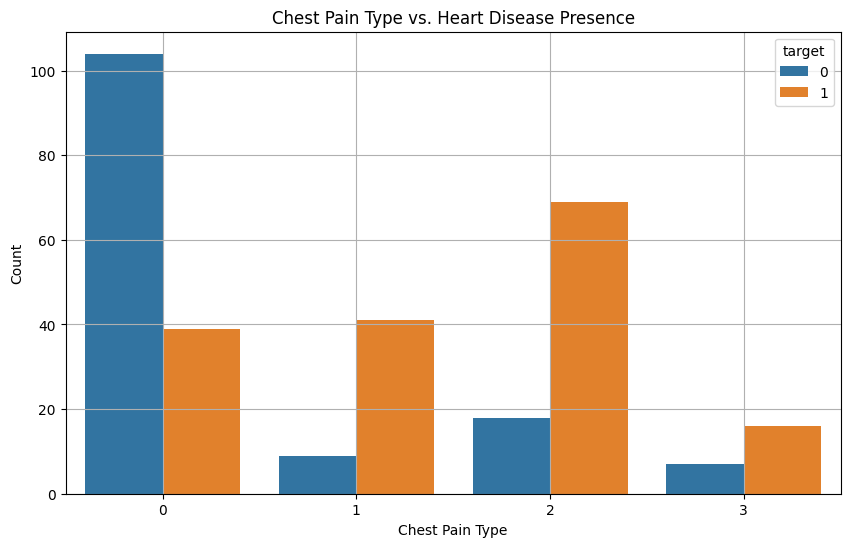

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=data)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Chest Pain Type vs. Heart Disease Presence')
plt.grid(True)
plt.show()


In [13]:
import plotly.express as px

# Create interactive box plot
fig = px.box(data, x='sex', y='thalach', color='sex', title='Gender vs. Max Heart Rate',
             labels={'sex': 'Gender', 'thalach': 'Max Heart Rate'})
fig.update_layout(xaxis=dict(title='Gender'), yaxis=dict(title='Max Heart Rate'), showlegend=False)
fig.show()
